In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi, sqrt

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

In [7]:
def plot_trajectories(*trajs,show_seconds=True):
    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices = []
            second = 0
            for i,t in enumerate(traj[0]):
                if t>= second:
                    second_indices.append(i)
                    second += 1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl = plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width , width * coords_height / coords_width)

In [8]:
def trajectory(theta,speed=20,height=0,dt=0.01,g=-9.81):
    vx = speed * cos(pi * theta / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,z = 0,0,height
    ts,xs,zs = [t],[x],[z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts, xs, zs

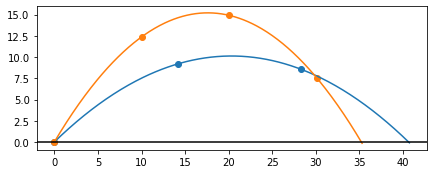

In [9]:
plot_trajectories(trajectory(45),trajectory(60))

In [10]:
def landing_position(traj):
    return traj[1][-1]

In [11]:
def hang_time(traj):
    return traj[0][-1]

In [12]:
def max_height(traj):
    return max(traj[2])

In [13]:
angles = range(0,95,5)

In [14]:
landing_positions = [landing_position(trajectory(theta)) for theta in angles]

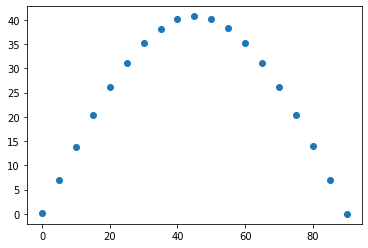

In [15]:
plt.scatter(angles,landing_positions)

In [16]:
landing_position(trajectory(50))

40.10994684444007

In [17]:
landing_position(trajectory(130))

-40.10994684444007

In [18]:
angles = range(0,185,5)

In [19]:
hang_times = [hang_time(trajectory(theta)) for theta in angles]

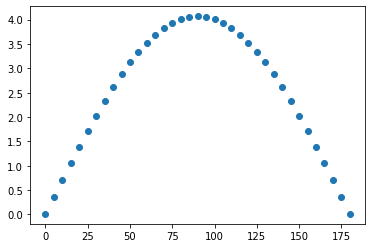

In [20]:
plt.scatter(angles,hang_times)

In [21]:
def plot_trajectory_metric(f, angles,**settings):
    results = [f(trajectory(theta,**settings)) for theta in angles]
    plt.scatter(angles,results)

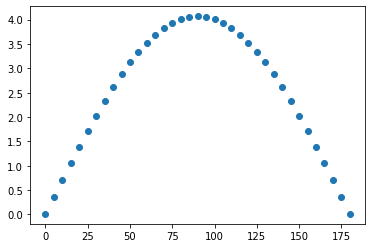

In [22]:
plot_trajectory_metric(hang_time,range(0,185,5))

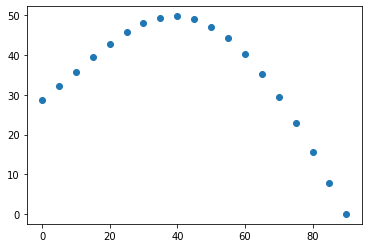

In [23]:
plot_trajectory_metric(landing_position,range(0,95,5),height=10)

In [24]:
def flat_ground(x,y):
    return 0

In [25]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground):
    vx = speed * cos(pi*theta/180)*cos(pi*phi/180)
    vy = speed * cos(pi*theta/180)*sin(pi*phi/180)
    vz = speed * sin(pi*theta/180)
    t,x,y,z = 0,0,0,height
    ts,xs,ys,zs = [t],[x],[y],[z]
    while z >= elevation(x,y):
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts,xs,ys,zs

In [26]:
def ridge(x,y):
    return (x**2 - 5*y**2) / 2500

In [27]:
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    fig, ax = plt.gcf(), plt.gca(projection='3d')
    fig.set_size_inches(7,7)    

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x
    
    else:
        xmin, xmax, ymin, ymax = bounds
    

    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')
    
    if zbounds:
        ax.set_zlim(*zbounds)

<ipython-input-27-7c9da98de410>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig, ax = plt.gcf(), plt.gca(projection='3d')


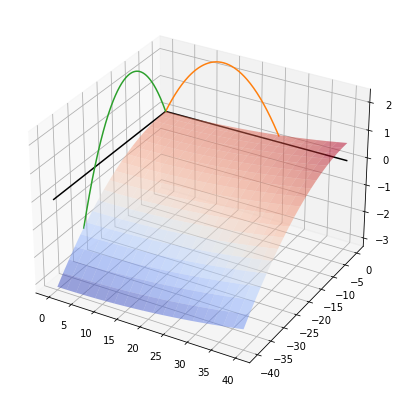

In [28]:
plot_trajectories_3d(
    trajectory3d(20,0,elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0,40,-40,0],
    elevation=ridge)

In [29]:
B = 0.0004
C = 0.005
v = 20
g = -9.81

In [30]:
def velocity_components(v,theta,phi):
    vx = v * cos(theta*pi/180) * cos(phi*pi/180)
    vy = v * cos(theta*pi/180) * sin(phi*pi/180)
    vz = v * sin(theta*pi/180)
    return vx,vy,vz

In [31]:
def landing_distance(theta,phi):
    vx,vy,vz = velocity_components(v,theta,phi)
    v_xy = sqrt(vx**2+vy**2)
    a = (g/2) - B * vx**2 + C * vy**2
    b = vz
    landing_time = -b/a
    landing_distance = v_xy * landing_time
    return landing_distance

In [32]:
landing_distance(30,240)

45.46065111729336

In [76]:
def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

In [77]:
def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

In [78]:
def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x: f(x,y0),x0,dx=dx)
    partial_y = approx_derivative(lambda y: f(x0,y),y0,dx=dx)
    return (partial_x,partial_y)

In [79]:
def landing_distance_gradient(theta,phi):
    return approx_gradient(landing_distance,theta,phi)

In [80]:
from vectors import length

In [81]:
def gradient_acent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

In [82]:
gradient_acent(landing_distance,36,83)

(37.58114747649905, 89.99991615950938)

In [83]:
def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [84]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

<ipython-input-84-68cf74b7ca34>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X,Y,z, cmap='plasma')


<Figure size 504x504 with 0 Axes>

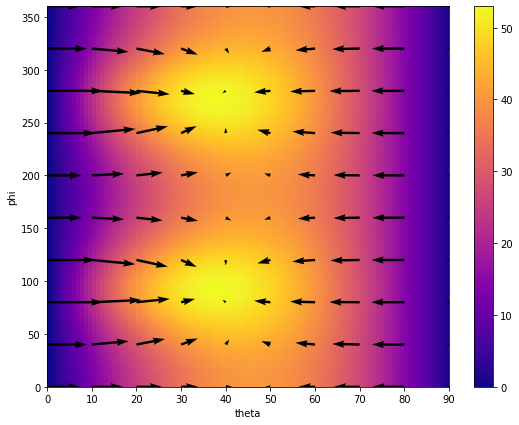

In [85]:
from vectors import to_polar, to_cartesian

def draw_arrow(tip,tail,color='k'):
    tip_length = (plt.xlim()[1] - plt.xlim()[0]) / 20.
    length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
    new_length = length - tip_length
    new_y = (tip[1] - tail[1]) * (new_length / length)
    new_x = (tip[0] - tail[0]) * (new_length / length)
    plt.gca().arrow(tail[0], tail[1], new_x, new_y,
    head_width=tip_length/1.5, 
    head_length=tip_length/2,
    fc=color, ec=color)
    
def plot_vector_field(f,xmin,xmax,ymin,ymax,xsteps=10,ysteps=10,color='k'):

    X,Y = np.meshgrid(np.linspace(xmin,xmax, xsteps),np.linspace(ymin,ymax, ysteps))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V,color=color)
    fig = plt.gcf()

scalar_field_heatmap(landing_distance,0,90,0,360)
plot_vector_field(landing_distance_gradient,0,90,0,360,xsteps=10,ysteps=10,color='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

<ipython-input-84-68cf74b7ca34>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X,Y,z, cmap='plasma')


<Figure size 504x504 with 0 Axes>

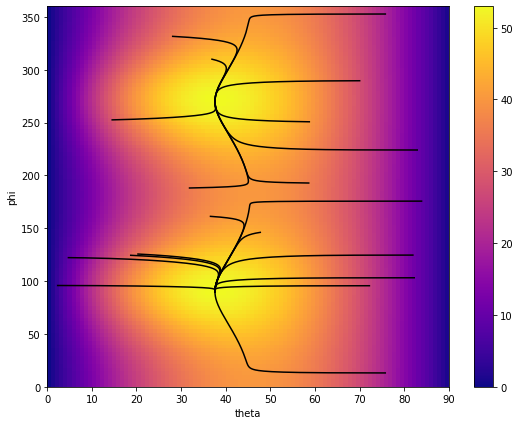

In [86]:
scalar_field_heatmap(landing_distance,0,90,0,360)
plt.xlabel('theta')
plt.ylabel('phi')
gap = gradient_ascent_points(landing_distance,60,190,1000)

from random import uniform
for x in range(0,20):
    gap = gradient_ascent_points(landing_distance,uniform(0,90),uniform(0,360))
    plt.plot(*gap,c='k')
plt.gcf().set_size_inches(9,7)

In [87]:
gradient_acent(landing_distance,0,180)

(45.45974527814323, 180.0)

In [88]:
def gradient_ascent_points_jump(f,xstart,ystart,tolerance=1e-6,jump_factor=1.5):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y) 
    while length(grad) > tolerance:
        x += grad[0] * jump_factor
        y += grad[1] * jump_factor 
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [89]:
gapj = gradient_ascent_points_jump(landing_distance,36,83)

In [90]:
gap = gradient_ascent_points(landing_distance,36,83)

In [91]:
len(gapj[0])

626

In [92]:
len(gap[0])

940